In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import joblib
import warnings



In [3]:

# Load the dataset
diabetes_df = pd.read_csv('diabetes.csv')

# Display basic information

print("DATASET OVERVIEW")
print(f"Shape: {diabetes_df.shape[0]} rows, {diabetes_df.shape[1]} columns")
print(f"\nColumn Names: {list(diabetes_df.columns)}")
print(f"\nTarget Variable: 'Outcome' (0 = No Diabetes, 1 = Diabetes)")


# Display first few rows
diabetes_df.head(10)

DATASET OVERVIEW
Shape: 768 rows, 9 columns

Column Names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Target Variable: 'Outcome' (0 = No Diabetes, 1 = Diabetes)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
# Data types and missing values
print("DATA TYPES AND MISSING VALUES")

print(diabetes_df.info())
print("\nMissing Values:")
print(diabetes_df.isnull().sum())

DATA TYPES AND MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Diabetes

In [8]:
# Statistical summary
print("STATISTICAL SUMMARY")

diabetes_df.describe().T

STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
# Target variable distribution
print("TARGET VARIABLE DISTRIBUTION")
outcome_counts = diabetes_df['Outcome'].value_counts()
print(f"Non-Diabetic (0): {outcome_counts[0]} ({outcome_counts[0]/len(diabetes_df)*100:.1f}%)")
print(f"Diabetic (1): {outcome_counts[1]} ({outcome_counts[1]/len(diabetes_df)*100:.1f}%)")

TARGET VARIABLE DISTRIBUTION
Non-Diabetic (0): 500 (65.1%)
Diabetic (1): 268 (34.9%)


In [12]:
# Mean values grouped by outcome
print("MEAN VALUES BY OUTCOME")
diabetes_df.groupby('Outcome').mean().round(2)

MEAN VALUES BY OUTCOME


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.30,109.98,68.18,19.66,68.79,30.30,0.43,31.19
1,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07


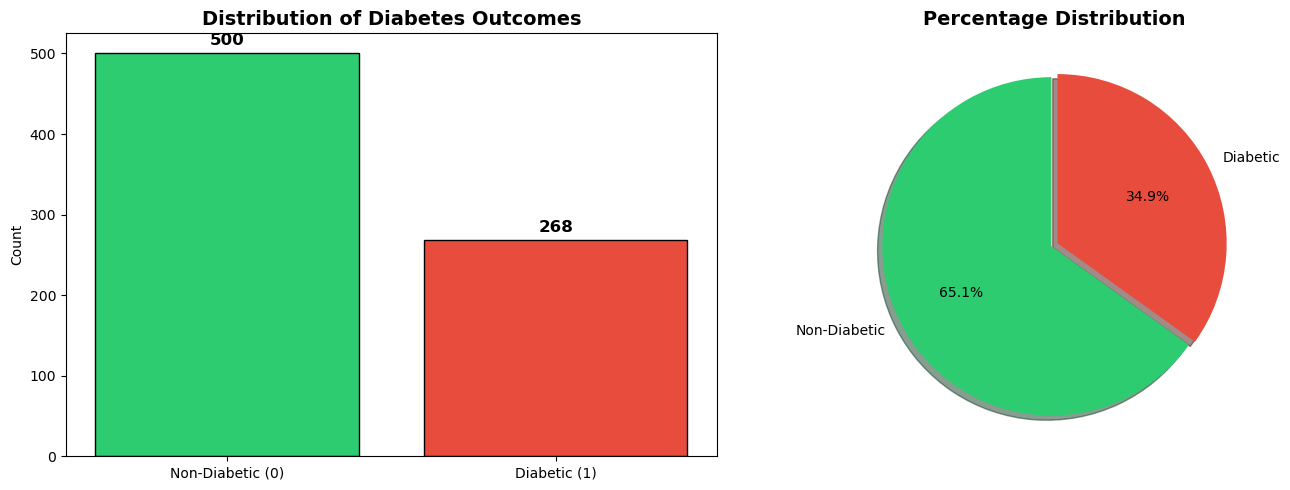

In [14]:
# Visualization of Outcome Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#2ecc71', '#e74c3c']
outcome_counts = diabetes_df['Outcome'].value_counts()
axes[0].bar(['Non-Diabetic (0)', 'Diabetic (1)'], outcome_counts.values, color=colors, edgecolor='black')
axes[0].set_title('Distribution of Diabetes Outcomes', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(outcome_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontsize=12, fontweight='bold')

# Pie chart
axes[1].pie(outcome_counts.values, labels=['Non-Diabetic', 'Diabetic'],
            autopct='%1.1f%%', colors=colors, startangle=90,
            explode=(0.02, 0.02), shadow=True)
axes[1].set_title('Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('outcome_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

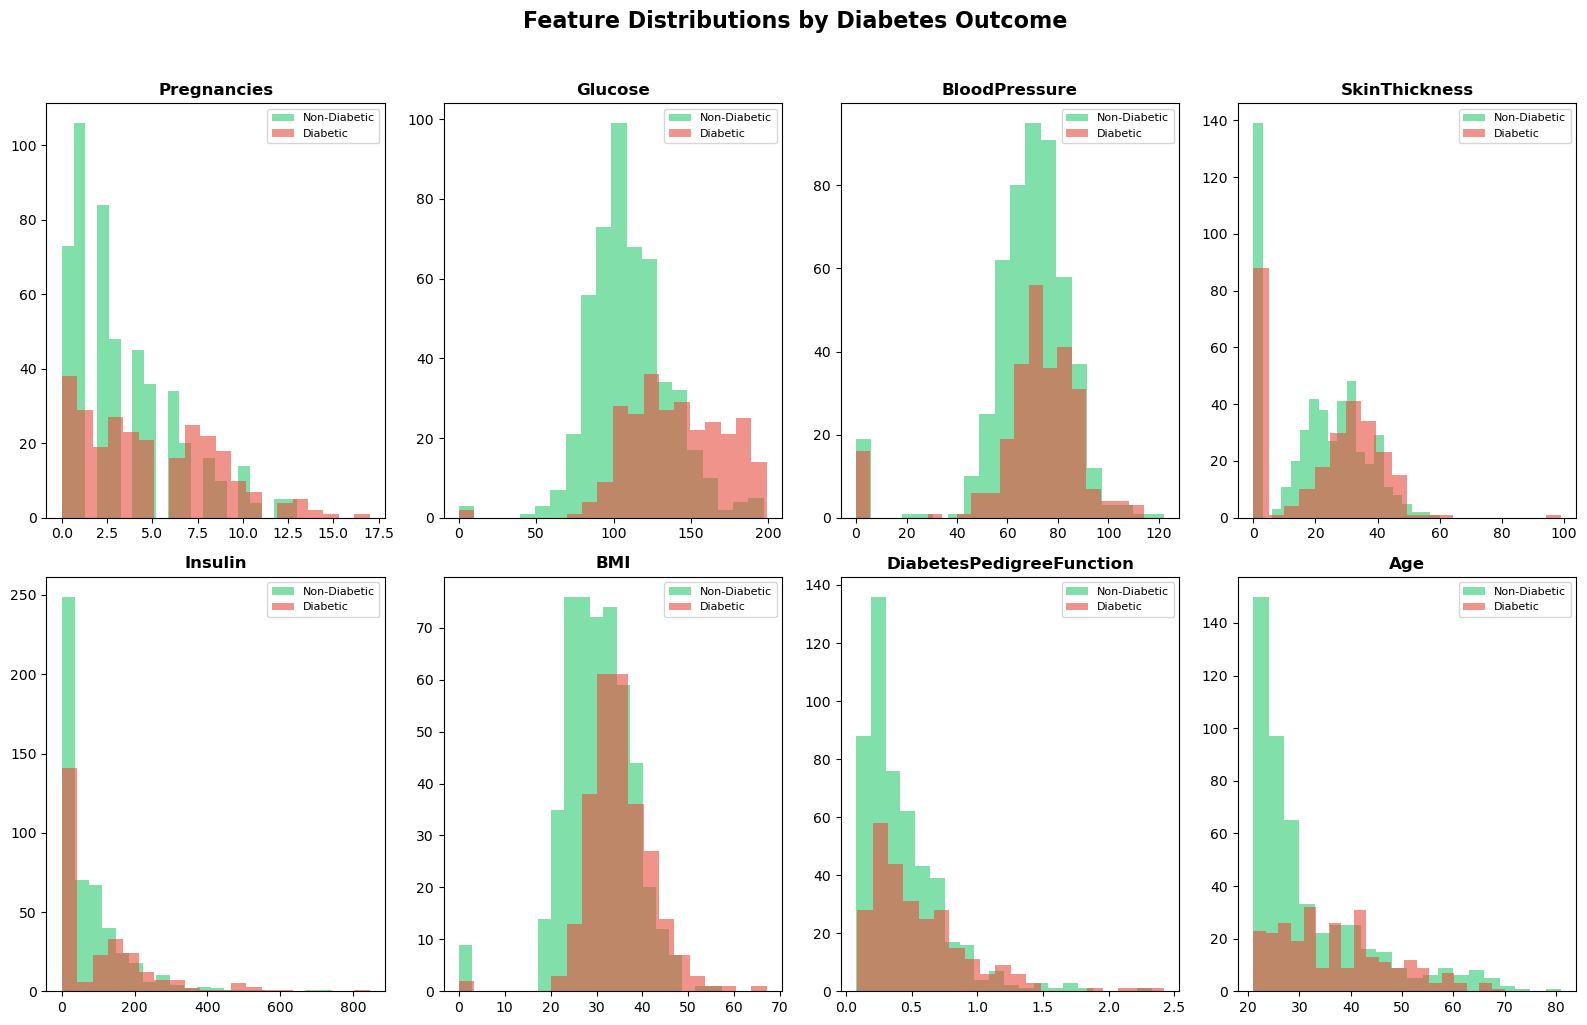

In [16]:
# Feature distributions by outcome
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
features = diabetes_df.columns[:-1]

for idx, feature in enumerate(features):
    ax = axes[idx // 4, idx % 4]
    for outcome in [0, 1]:
        data = diabetes_df[diabetes_df['Outcome'] == outcome][feature]
        label = 'Diabetic' if outcome == 1 else 'Non-Diabetic'
        color = '#e74c3c' if outcome == 1 else '#2ecc71'
        ax.hist(data, alpha=0.6, label=label, color=color, bins=20)
    ax.set_title(feature, fontsize=12, fontweight='bold')
    ax.legend(fontsize=8)

plt.suptitle('Feature Distributions by Diabetes Outcome', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

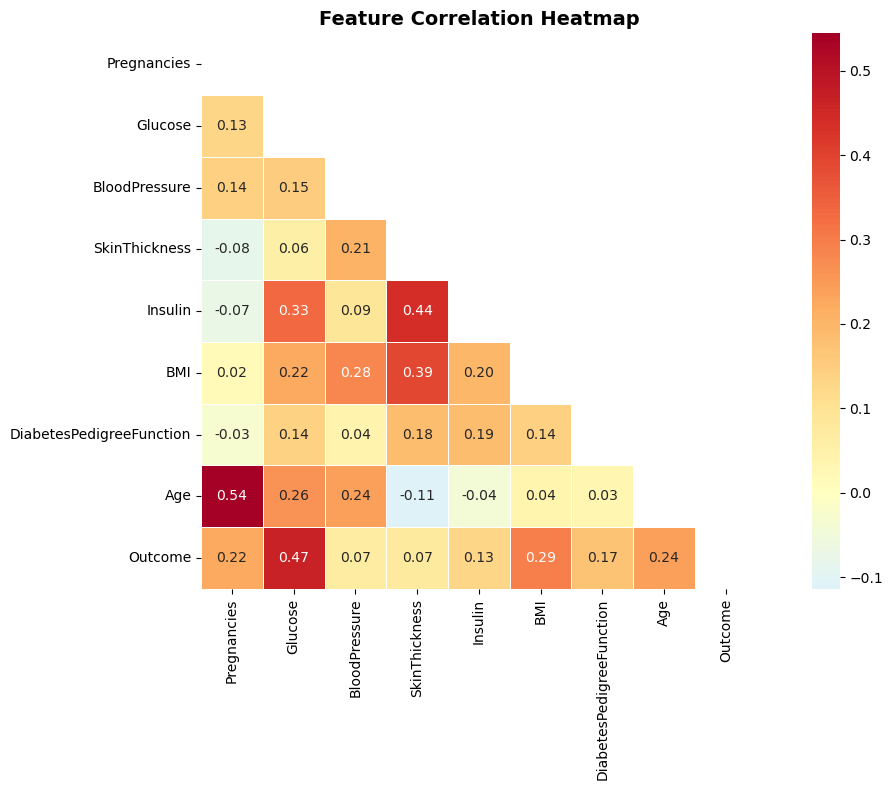


Correlation with Outcome (sorted):
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = diabetes_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r',
            mask=mask, center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nCorrelation with Outcome (sorted):")
print(correlation_matrix['Outcome'].drop('Outcome').sort_values(ascending=False))

In [18]:

#  DATA PREPROCESSING


# Identify columns with potentially invalid zero values
# (Zero values in these columns are likely missing data)
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("CHECKING FOR INVALID ZERO VALUES")
for col in zero_cols:
    zero_count = (diabetes_df[col] == 0).sum()
    zero_pct = zero_count / len(diabetes_df) * 100
    print(f"{col}: {zero_count} zeros ({zero_pct:.1f}%)")

CHECKING FOR INVALID ZERO VALUES
Glucose: 5 zeros (0.7%)
BloodPressure: 35 zeros (4.6%)
SkinThickness: 227 zeros (29.6%)
Insulin: 374 zeros (48.7%)
BMI: 11 zeros (1.4%)


In [19]:
# Replace zero values with median (by outcome group)
# This is more appropriate than overall median
diabetes_clean = diabetes_df.copy()

for col in zero_cols:
    # Replace zeros with NaN first
    diabetes_clean[col] = diabetes_clean[col].replace(0, np.nan)
    
    # Fill NaN with median by outcome group
    for outcome in [0, 1]:
        median_val = diabetes_df[diabetes_df['Outcome'] == outcome][col].median()
        mask = (diabetes_clean['Outcome'] == outcome) & (diabetes_clean[col].isna())
        diabetes_clean.loc[mask, col] = median_val


print(f"\nDataset shape after cleaning: {diabetes_clean.shape}")
print("\nZero values after cleaning:")
for col in zero_cols:
    print(f"  {col}: {(diabetes_clean[col] == 0).sum()}")


Dataset shape after cleaning: (768, 9)

Zero values after cleaning:
  Glucose: 0
  BloodPressure: 0
  SkinThickness: 0
  Insulin: 138
  BMI: 0


In [24]:

# FEATURE ENGINEERING AND TRAIN-TEST SPLIT


# Separate features and target
X = diabetes_clean.drop('Outcome', axis=1)
y = diabetes_clean['Outcome']

# Feature names for later use
feature_names = X.columns.tolist()
print("Features:", feature_names)
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Train-test split (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


print("TRAIN-TEST SPLIT")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining class distribution:")
print(y_train.value_counts())

Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Feature matrix shape: (768, 8)
Target vector shape: (768,)
TRAIN-TEST SPLIT
Training set: 614 samples
Test set: 154 samples

Training class distribution:
Outcome
0    400
1    214
Name: count, dtype: int64


In [26]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nScaled training data - Mean: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")


Scaled training data - Mean: 0.000000, Std: 1.000000


In [28]:

# MODEL TRAINING AND COMPARISON


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train and evaluate a model, returning metrics dictionary."""
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
    }
    
    # ROC-AUC (if model supports probability)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        metrics['ROC-AUC'] = roc_auc_score(y_test, y_prob)
    except:
        metrics['ROC-AUC'] = None
    
    return metrics, model



In [30]:
# Define models to compare
models = {
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate all models
results = []
trained_models = {}

print("MODEL TRAINING AND EVALUATION")


for name, model in models.items():
    print(f"\n Training {name}")
    metrics, trained_model = evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test, name
    )
    results.append(metrics)
    trained_models[name] = trained_model
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

results_df.round(4)

MODEL TRAINING AND EVALUATION

 Training SVM (RBF Kernel)
  Accuracy: 0.7987

 Training SVM (Linear)
  Accuracy: 0.7013

 Training Random Forest
  Accuracy: 0.8961

 Training Logistic Regression
  Accuracy: 0.7273


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
SVM (RBF Kernel),0.7987,0.7091,0.7222,0.7156,0.8544
SVM (Linear),0.7013,0.6000,0.4444,0.5106,0.8254
Random Forest,0.8961,0.8958,0.7963,0.8431,0.9538
Logistic Regression,0.7273,0.6429,0.5000,0.5625,0.8209


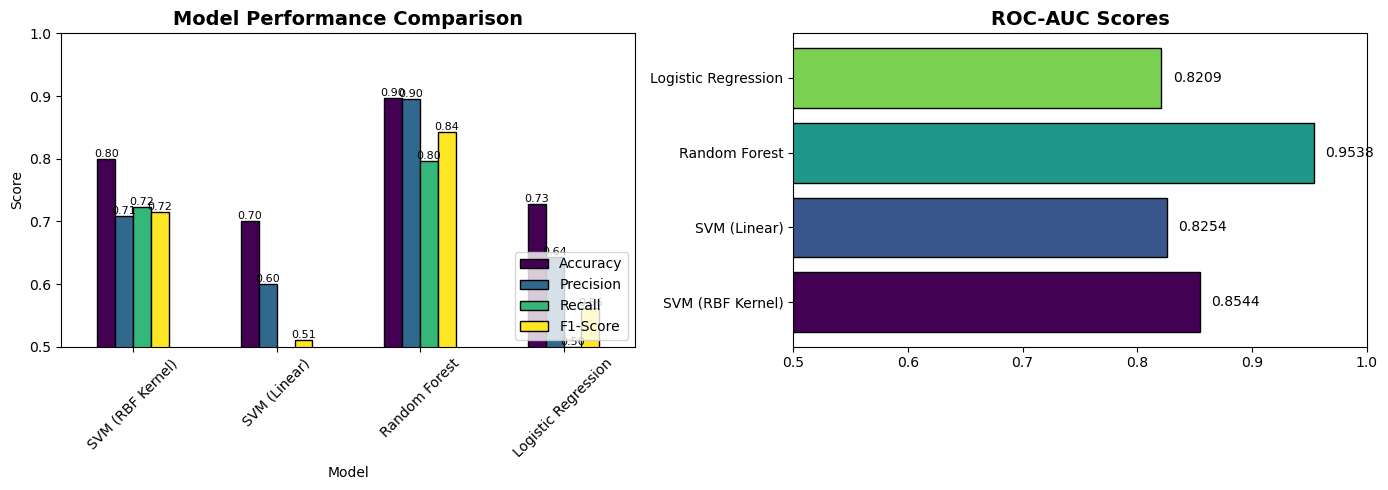

In [32]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of accuracy
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df[metrics_to_plot].plot(kind='bar', ax=axes[0], colormap='viridis', edgecolor='black')
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0.5, 1.0)
axes[0].legend(loc='lower right')
axes[0].tick_params(axis='x', rotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', fontsize=8)

# ROC-AUC comparison
roc_auc_scores = results_df['ROC-AUC'].dropna()
colors = plt.cm.viridis(np.linspace(0, 0.8, len(roc_auc_scores)))
axes[1].barh(roc_auc_scores.index, roc_auc_scores.values, color=colors, edgecolor='black')
axes[1].set_title('ROC-AUC Scores', fontsize=14, fontweight='bold')
axes[1].set_xlim(0.5, 1.0)
for i, v in enumerate(roc_auc_scores.values):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [34]:

# BEST MODEL SELECTION AND HYPERPARAMETER TUNING


# Select best model based on ROC-AUC (or accuracy if ROC-AUC not available)
best_model_name = results_df['ROC-AUC'].idxmax()
print(f" Best performing model: {best_model_name}")
print(f"   ROC-AUC: {results_df.loc[best_model_name, 'ROC-AUC']:.4f}")

# Hyperparameter tuning for SVM (our selected model for deployment)

print("HYPERPARAMETER TUNING FOR SVM")


# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Grid search with cross-validation
svm_model = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(
    svm_model, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\n Best Parameters: {grid_search.best_params_}")
print(f" Best Cross-Validation ROC-AUC: {grid_search.best_score_:.4f}")

 Best performing model: Random Forest
   ROC-AUC: 0.9538
HYPERPARAMETER TUNING FOR SVM
Fitting 5 folds for each of 24 candidates, totalling 120 fits

 Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
 Best Cross-Validation ROC-AUC: 0.8675


In [35]:

 # FINAL MODEL EVALUATION

# Use the best model from grid search
best_model = grid_search.best_estimator_

# Final predictions
y_pred_final = best_model.predict(X_test_scaled)
y_prob_final = best_model.predict_proba(X_test_scaled)[:, 1]

# Classification report

print("FINAL MODEL CLASSIFICATION REPORT")

print(classification_report(y_test, y_pred_final, target_names=['Non-Diabetic', 'Diabetic']))

# Final metrics
final_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'Precision': precision_score(y_test, y_pred_final),
    'Recall': recall_score(y_test, y_pred_final),
    'F1-Score': f1_score(y_test, y_pred_final),
    'ROC-AUC': roc_auc_score(y_test, y_prob_final)
}

print("\n Final Metrics Summary:")
for metric, value in final_metrics.items():
    print(f"   {metric}: {value:.4f}")

FINAL MODEL CLASSIFICATION REPORT
              precision    recall  f1-score   support

Non-Diabetic       0.85      0.84      0.84       100
    Diabetic       0.71      0.72      0.72        54

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154


 Final Metrics Summary:
   Accuracy: 0.7987
   Precision: 0.7091
   Recall: 0.7222
   F1-Score: 0.7156
   ROC-AUC: 0.8544


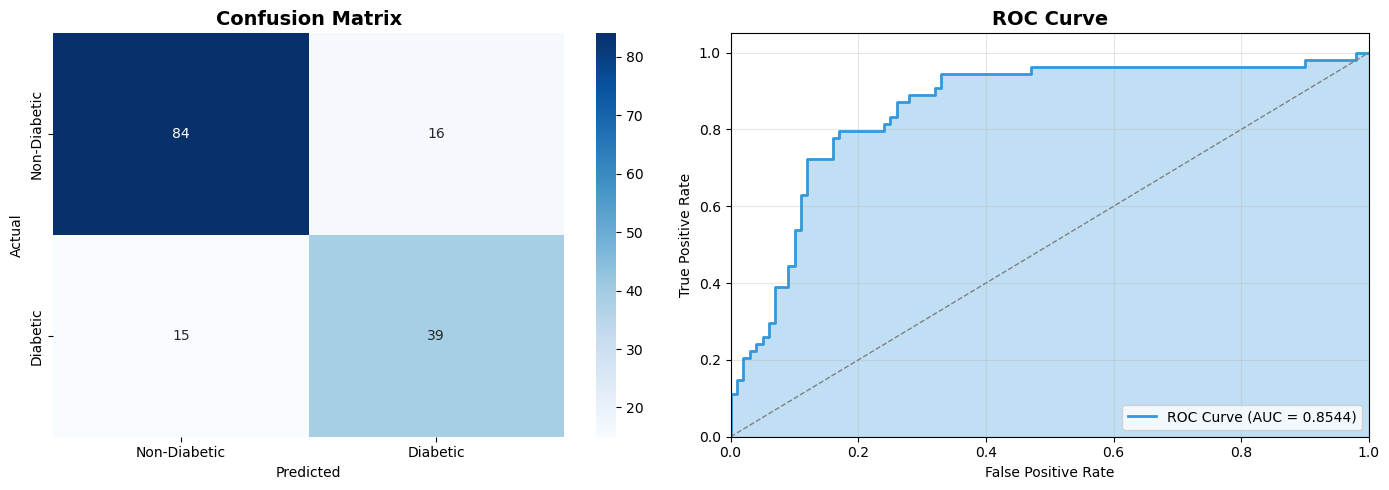

In [38]:
# Confusion Matrix and ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_final)
roc_auc = roc_auc_score(y_test, y_prob_final)

axes[1].plot(fpr, tpr, color='#3498db', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
axes[1].fill_between(fpr, tpr, alpha=0.3, color='#3498db')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=150, bbox_inches='tight')
plt.show()

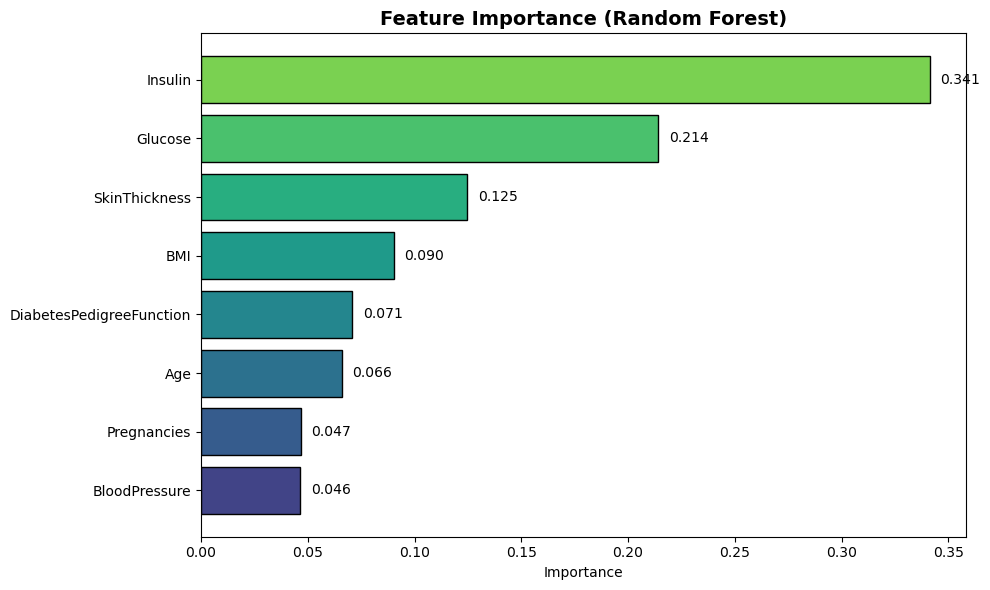


 Top 3 Most Important Features:
   Insulin: 0.3413
   Glucose: 0.2140
   SkinThickness: 0.1246


In [40]:
# Feature importance (from Random Forest for interpretability)
rf_model = trained_models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(feature_importance)))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors, edgecolor='black')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    plt.text(row['Importance'] + 0.005, i, f'{row["Importance"]:.3f}', va='center', fontsize=10)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n Top 3 Most Important Features:")
top_features = feature_importance.tail(3)
for idx, row in top_features.iloc[::-1].iterrows():
    print(f"   {row['Feature']}: {row['Importance']:.4f}")

In [42]:

#  SAVE MODEL AND SCALER FOR DEPLOYMENT


# Save the best model
model_path = 'diabetes_model.pkl'
scaler_path = 'scaler_svm.pkl'

joblib.dump(best_model, model_path)
joblib.dump(scaler, scaler_path)


print("MODEL SAVED SUCCESSFULLY!")

print(f" Model saved to: {model_path}")
print(f" Scaler saved to: {scaler_path}")
print(f"\n Model Details:")
print(f"   Type: SVM ({best_model.kernel} kernel)")
print(f"   Parameters: C={best_model.C}, gamma={best_model.gamma}")


MODEL SAVED SUCCESSFULLY!
 Model saved to: diabetes_model.pkl
 Scaler saved to: scaler_svm.pkl

 Model Details:
   Type: SVM (rbf kernel)
   Parameters: C=1, gamma=scale


In [44]:

# TEST MODEL LOADING 


# Load model and scaler to verify they work
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)

# Test prediction with sample data
sample_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])  # First row from dataset
sample_scaled = loaded_scaler.transform(sample_data)
prediction = loaded_model.predict(sample_scaled)[0]
probability = loaded_model.predict_proba(sample_scaled)[0]


print("MODEL VERIFICATION TEST")

print(f"Sample Input: {sample_data[0]}")
print(f"Prediction: {'Diabetic' if prediction == 1 else 'Non-Diabetic'}")
print(f"Probabilities: Non-Diabetic={probability[0]:.2%}, Diabetic={probability[1]:.2%}")


MODEL VERIFICATION TEST
Sample Input: [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
Prediction: Diabetic
Probabilities: Non-Diabetic=3.30%, Diabetic=96.70%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
